In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

C:\Users\rodoh\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [38]:
enddate = date.datetime(2020,4,29)
startdate = date.datetime(2019,4,1)
tick = 'C'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [14]:
pd.set_option('display.max_rows',None)

In [39]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,64.629997,62.820000,62.849998,64.360001,17736300.0,62.605659
2019-04-02,64.860001,63.919998,64.239998,64.419998,9915800.0,62.664021
2019-04-03,65.349998,64.529999,64.989998,65.059998,11560800.0,63.286572
2019-04-04,66.199997,64.809998,64.809998,65.820000,11915700.0,64.025864
2019-04-05,66.410004,65.190002,65.930000,65.550003,11062400.0,63.763229


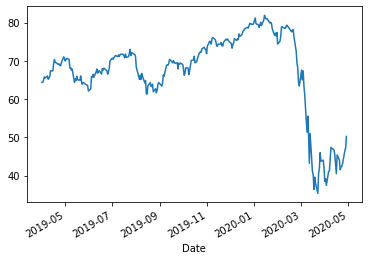

In [40]:
%matplotlib inline
data.Close.plot()

# Oscilador Estocastico

In [6]:
def STO(df, nK, nD, nS=1):
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min())/(df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SOk'+str(nK) )
    SOd = pd.Series(SOk.ewm(ignore_na = False, span = nD, min_periods = nD -1, adjust = True).mean(), name = 'SOd'+str(nD))
    SOk = SOk.ewm(ignore_na = False, span = nS, min_periods = nS - 1 , adjust = True).mean()
    SOd = SOd.ewm(ignore_na = False, span = nS, min_periods = nS - 1 , adjust = True).mean()
    df = df.join(SOk)
    df = df.join(SOd)
    df['Recomendacion'] = 0
    df.loc[(((SOk < SOd) & (SOk.shift(1) > SOd.shift(1))) & (SOd > 0.8)),'Recomendacion'] = 'Vender'
    df.loc[(((SOk > SOd) & (SOk.shift(1) < SOd.shift(1))) & (SOd < 0.2)),'Recomendacion'] = 'Comprar'
    df.loc[ df['Recomendacion'] == 0, 'Recomendacion'] = '-'

    return df

In [41]:
df2 = STO(data, 14, 3)

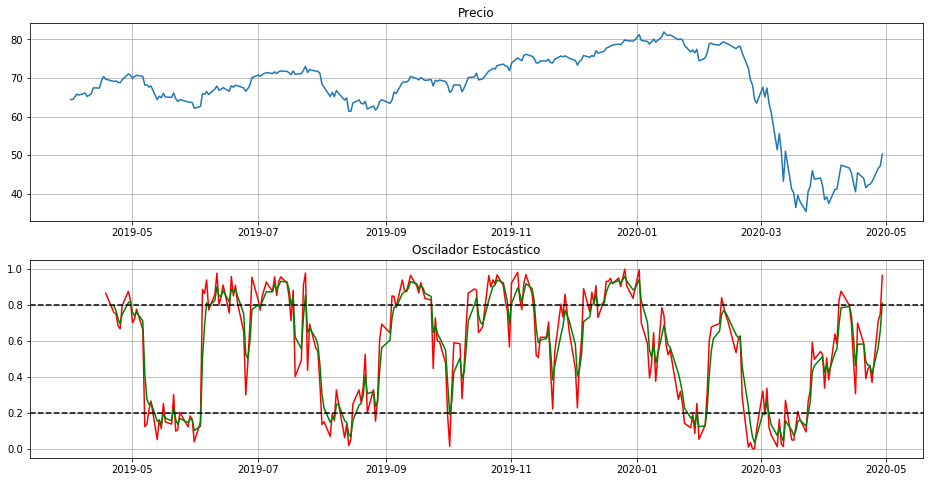

In [42]:
fig = plt.figure(figsize = (16,8))
ax1 = plt.subplot(211)
plt.plot(df2.Close)
plt.grid(True)
plt.title('Precio')
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(df2.SOk14, color = 'r')
plt.plot(df2.SOd3, color = 'g')
plt.axhline(y=0.8, color = 'k', linestyle = '--')
plt.axhline(y=0.2, color = 'k', linestyle = '--')
plt.title('Oscilador Estocástico')
plt.grid(True)
plt.show()

In [43]:
df2[['Close', 'Recomendacion']]

,Close,Recomendacion
Date,,
2019-04-01,64.360001,-
2019-04-02,64.419998,-
2019-04-03,65.059998,-
2019-04-04,65.820000,-
2019-04-05,65.550003,-
2019-04-08,66.070000,-
2019-04-09,65.199997,-
2019-04-10,65.519997,-
2019-04-11,65.910004,-
